<a href="https://colab.research.google.com/github/rafi007akhtar/coursera-tensorflow/blob/master/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [7]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [9]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as file:
      # Your code starts here
      
      # read the file
      csvr = csv.reader(file, delimiter=",")
      
      first_line = True
      images = []
      labels = []
      for row in csvr:
        if first_line:
          # ignore first line as it is header
          first_line = False 
          continue
        labels.append(row[0]) # append the labels
        images.append(np.array_split(row[1:785], 28)) # convert the pixels into 28x28 and append
      
      # convert string into floats
      labels = np.array(labels).astype("float")
      images = np.array(images).astype("float")
      # Your code ends here
      
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [10]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(26, activation="softmax")
])

# Compile Model. 
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["acc"]
)

# Train the Model
history = model.fit_generator(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch = len(training_images)/32,
    epochs = 20,
    validation_data = validation_datagen.flow(testing_images, testing_labels, 32),
    validation_steps = len(testing_images)/32
)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


W0614 06:25:20.228301 140206417143680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/20
858/857 [==============================] - 52s 61ms/step - loss: 2.8419 - acc: 0.1364 - val_loss: 2.0139 - val_acc: 0.3390
Epoch 2/20
858/857 [==============================] - 51s 60ms/step - loss: 2.1566 - acc: 0.3201 - val_loss: 1.3540 - val_acc: 0.5349
Epoch 3/20
858/857 [==============================] - 51s 60ms/step - loss: 1.7718 - acc: 0.4319 - val_loss: 1.0517 - val_acc: 0.6404
Epoch 4/20
858/857 [==============================] - 52s 60ms/step - loss: 1.5365 - acc: 0.5016 - val_loss: 0.9036 - val_acc: 0.6732
Epoch 5/20
858/857 [==============================] - 51s 60ms/step - loss: 1.3700 - acc: 0.5499 - val_loss: 0.8312 - val_acc: 0.7026
Epoch 6/20
858/857 [==============================] - 51s 60ms/step - loss: 1.2343 - acc: 0.5933 - val_loss: 0.8199 - val_acc: 0.7312
Epoch 7/20
858/857 [==============================] - 51s 59ms/step - loss: 1.1515 - acc: 0.6182 - val_loss: 0.6531 - val_acc: 0.7782
Epoch 8/20
858/857 [==============================] - 51s 59ms

[215.41044095023943, 0.63190186]

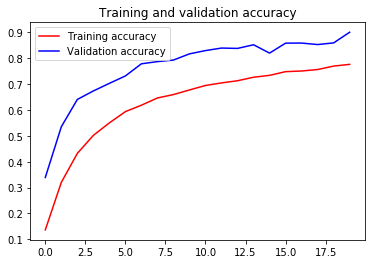

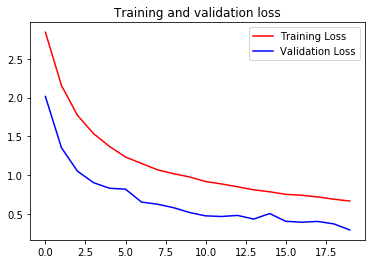

In [13]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()